In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math
from feature_matching import sift

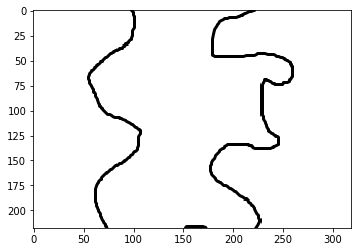

In [66]:
# Load an example
img = cv.imread('data/img1.png', 0)

# Generate a random rotated example
scale_factor = 1
rot_angle = 90

scale_img = cv.resize(img, (0,0), fx=scale_factor, fy=scale_factor)
rot_mat = cv.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), rot_angle, 1)

rot_img = cv.warpAffine(scale_img, rot_mat, (img.shape[1], img.shape[0]), borderValue=255)


plt.imshow(rot_img, cmap='gray')

input1 = img.copy()
input2 = rot_img.copy()

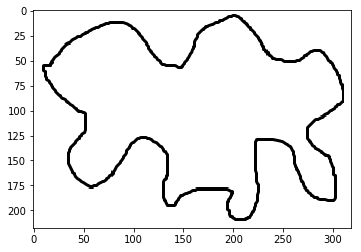

In [67]:
plt.imshow(img, cmap='gray')

In [68]:
# Feature detection and mathching
pts1, kp1, desc1, pts2, kp2, desc2, good, matchesMask, M = sift(input1, input2)

# Draw matches
draw_params = dict(matchColor=(0, 255, 0), 
                  singlePointColor=None,
                   matchesMask=matchesMask,
                  flags=2)

match_img = cv.drawMatches(input1, kp1, input2, kp2, good, None, **draw_params)

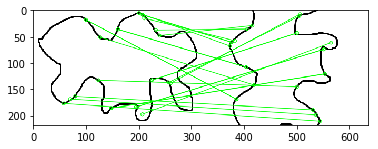

In [69]:
plt.imshow(match_img)

In [70]:
# Rigid transformation
cent1 = pts1.mean()
cent2 = pts2.mean()
cent1 = pts1 - cent1
cent2 = pts2 - cent2

H = np.matmul(cent1.T, cent2)
U, S, V = np.linalg.svd(H)

R = np.matmul(V.T, U.T)

In [71]:
# Solution 1 
math.acos(R[0, 0])*180/math.pi

90.05015968196741

In [72]:
# Solution 2
math.acos(M[0, 0])*180/math.pi

89.93265207926184